In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Read in the generator data previously preprocessed by ERTAC EGU tool
base_gen = pd.read_csv('../for_SMOKE/C2.1.1CONUSv16.0_BYFYHRLY_NCD_fs_ff10_hourly_future.csv', nrows=433, header=8)
base_gen

,country_cd,region_cd,tribal_code,facility_id,unit_id,rel_point_id,process_id,scc,poll,op_type_cd,...,hrvl15,hrvl16,hrvl17,hrvl18,hrvl19,hrvl20,hrvl21,hrvl22,hrvl23,coment
0,US,1097,NaN,1056111,47671513,45197212,61246814,10100201,NOX,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,US,1097,NaN,1056111,47671513,45197212,61246814,10100201,NOX,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,US,1097,NaN,1056111,47671513,45197212,61246814,10100201,NOX,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,US,1097,NaN,1056111,47671513,45197212,61246814,10100201,NOX,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,US,1097,NaN,1056111,47671513,45197212,61246814,10100201,NOX,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,US,1097,NaN,1056111,47671213,45197212,61247114,10100201,NH3,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
429,US,1097,NaN,1056111,47671213,45197212,61247114,10100201,NH3,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
430,US,1097,NaN,1056111,47671213,45197212,61247114,10100201,NH3,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
431,US,1097,NaN,1056111,47671213,45197212,61247114,10100201,NH3,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [34]:
# Read in data from the NY Simple Net
ed_gen = pd.read_csv('../ed_output/thermal_with_renewable_20160805_20160815.csv', parse_dates=['TimeStamp'], infer_datetime_format=True)
ed_gen = ed_gen.set_index('TimeStamp')
ed_gen.head()

,Allegany,Arthur Kill ST 2,Arthur Kill ST 3,Astoria 2,Astoria 3,Astoria 5,Astoria CC 1,Astoria CC 2,Astoria East Energy - CC1,Astoria East Energy - CC2,...,Northport GT,Ravenswood 01,Ravenswood 10,Ravenswood 11,S Hampton 1,Shoreham 1,Shoreham 2,South Cairo,Southold 1,St. Elizabeth Medical Center
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2016-08-05 00:00:00,11,96,1.0,1.0,40.0,2.0,318,320,313.0,313,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0
2016-08-05 01:00:00,11,96,1.0,1.0,40.0,2.0,318,320,313.0,313,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0
2016-08-05 02:00:00,11,96,1.0,1.0,40.0,2.0,318,320,313.0,313,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0
2016-08-05 03:00:00,11,96,1.0,1.0,40.0,2.0,318,320,163.0,313,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0
2016-08-05 04:00:00,11,96,1.0,1.0,40.0,2.0,318,320,163.0,166,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0


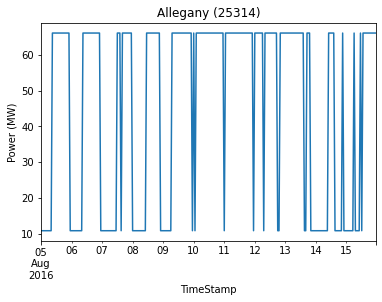

In [36]:
ed_gen.iloc[:,0].plot()
plt.title('Allegany (25314)')
plt.ylabel('Power (MW)')
plt.show()


In [7]:
# Read in the generator info
ed_gen_info = pd.read_csv('../ed_output/genInfo.csv')
ed_gen_info.head()

,NYISOName,PTID,Zone,UnitType,FuelType,Latitude,Longitude,maxPower,minPower,maxRampAgc,maxRamp10,maxRamp30,maxRamp60,HeatRateLM_R2,HeatRateQM_R2,BusName,NCOST,cost_1,cost_0
0,Allegany,23514,B,Combined Cycle,Natural Gas,42.5083,-78.0661,66.0,11.0,0.733333,7.333333,22.00,44.0,0.862443,0.891407,62,1,22.682017,-40.234372
1,Arthur Kill ST 2,23512,J,Steam Turbine,Natural Gas,40.5915,-74.2027,349.0,96.0,2.850000,28.500000,85.50,171.0,0.995837,0.995860,82,1,25.306225,736.980064
2,Arthur Kill ST 3,23513,J,Steam Turbine,Natural Gas,40.5915,-74.2027,539.0,1.0,3.108333,31.083333,93.25,186.5,0.986235,0.991460,82,1,25.957282,993.894899
3,Astoria 2,24149,J,Steam Turbine,Natural Gas,40.7869,-73.9122,153.0,1.0,0.808333,8.083333,24.25,48.5,0.987563,0.988910,82,1,31.302863,430.832898
4,Astoria 3,23516,J,Steam Turbine,Fuel Oil 2,40.7869,-73.9122,756.0,40.0,6.033333,60.333333,181.00,362.0,0.996075,0.996269,82,1,66.084194,3680.943877


In [10]:
# Read in the lookup table where the RGGI to NYISO IDs are kept
conversion = pd.read_csv('../ed_output/RGGI_to_NYISO.csv', header=1)
conversion.head()

,RGGI Facility Name,ORISPL,Unit ID,NYISO Name,PTID,Notes,Unnamed: 6
0,23rd & 3rd,7910,2301,Gowanus 5,24156,NaN,NaN
1,23rd & 3rd,7910,2302,Gowanus 6,24157,NaN,NaN
2,AG-Energy,10803,1,NaN,999999999,Closed in 2014,NaN
3,AG-Energy,10803,2,NaN,999999999,Closed in 2014,NaN
4,Allegany Station No. 133,10619,1,Allegany,23514,NaN,NaN


In [50]:
ed_gen_info['ORISPL'] = np.zeros_like(ed_gen_info['PTID'])

In [58]:
for ii, id in enumerate(ed_gen_info['PTID']):
    match = (conversion['PTID'] == str(id))
    orispl = conversion['ORISPL'][match]
    try:
        ed_gen_info.at[ii,'ORISPL'] = orispl.values[0]
    except:
        ed_gen_info.at[ii,'ORISPL'] = None

In [59]:
ed_gen_info

,NYISOName,PTID,Zone,UnitType,FuelType,Latitude,Longitude,maxPower,minPower,maxRampAgc,maxRamp10,maxRamp30,maxRamp60,HeatRateLM_R2,HeatRateQM_R2,BusName,NCOST,cost_1,cost_0,ORISPL
0,Allegany,23514,B,Combined Cycle,Natural Gas,42.508300,-78.066100,66.0,11.0,0.733333,7.333333,22.00,44.0,0.862443,0.891407,62,1,22.682017,-40.234372,10619.0
1,Arthur Kill ST 2,23512,J,Steam Turbine,Natural Gas,40.591500,-74.202700,349.0,96.0,2.850000,28.500000,85.50,171.0,0.995837,0.995860,82,1,25.306225,736.980064,2490.0
2,Arthur Kill ST 3,23513,J,Steam Turbine,Natural Gas,40.591500,-74.202700,539.0,1.0,3.108333,31.083333,93.25,186.5,0.986235,0.991460,82,1,25.957282,993.894899,2490.0
3,Astoria 2,24149,J,Steam Turbine,Natural Gas,40.786900,-73.912200,153.0,1.0,0.808333,8.083333,24.25,48.5,0.987563,0.988910,82,1,31.302863,430.832898,8906.0
4,Astoria 3,23516,J,Steam Turbine,Fuel Oil 2,40.786900,-73.912200,756.0,40.0,6.033333,60.333333,181.00,362.0,0.996075,0.996269,82,1,66.084194,3680.943877,8906.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Shoreham 1,23715,K,Combustion Turbine,Fuel Oil 2,40.957200,-72.866400,52.9,0.0,0.881667,8.816667,26.45,52.9,0.000000,0.000000,80,1,195.331050,0.000000,NaN
223,Shoreham 2,23716,K,Jet Engine,Fuel Oil 2,40.957200,-72.866400,18.6,0.0,0.310000,3.100000,9.30,18.6,0.000000,0.000000,80,1,195.331050,0.000000,NaN
224,South Cairo,23612,G,Combustion Turbine,Kerosene,42.291275,-73.986452,21.6,0.0,0.360000,3.600000,10.80,21.6,0.000000,0.000000,39,1,195.331050,0.000000,NaN
225,Southold 1,23719,K,Combustion Turbine,Fuel Oil 2,41.105900,-72.376100,14.0,0.0,0.233333,2.333333,7.00,14.0,0.000000,0.000000,80,1,195.331050,0.000000,NaN
